# Jupyter Notebook to develop a Model for accurate prediction of Breast Tumour in Women through Machine Learning Algorithms

# In our analysis, we will use three Machine Learning Algorithms: Logistic Regression, Naive Bayes, Support Vector Machines.


In [1]:
#Importing important modules and library to perform our Data Analysis and Machine Learning Algorithms 
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Breast Cancer Data onto a Pandas Dataframe

cd=load_breast_cancer()
dataset = pd.DataFrame(np.c_[cd['data'],cd['target']],columns = np.append(cd['feature_names'],['target']))

# Pre-Emptive Data Analysis 

In [3]:
#The Data will be pre-emptively analyzed to make the best out of it and help us understand the best fit for the algorithms

In [4]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [6]:
#Here the Target has two values: 0 and 1. 0 depicts a malignant tumour while 1 depicts a benign tumour. 

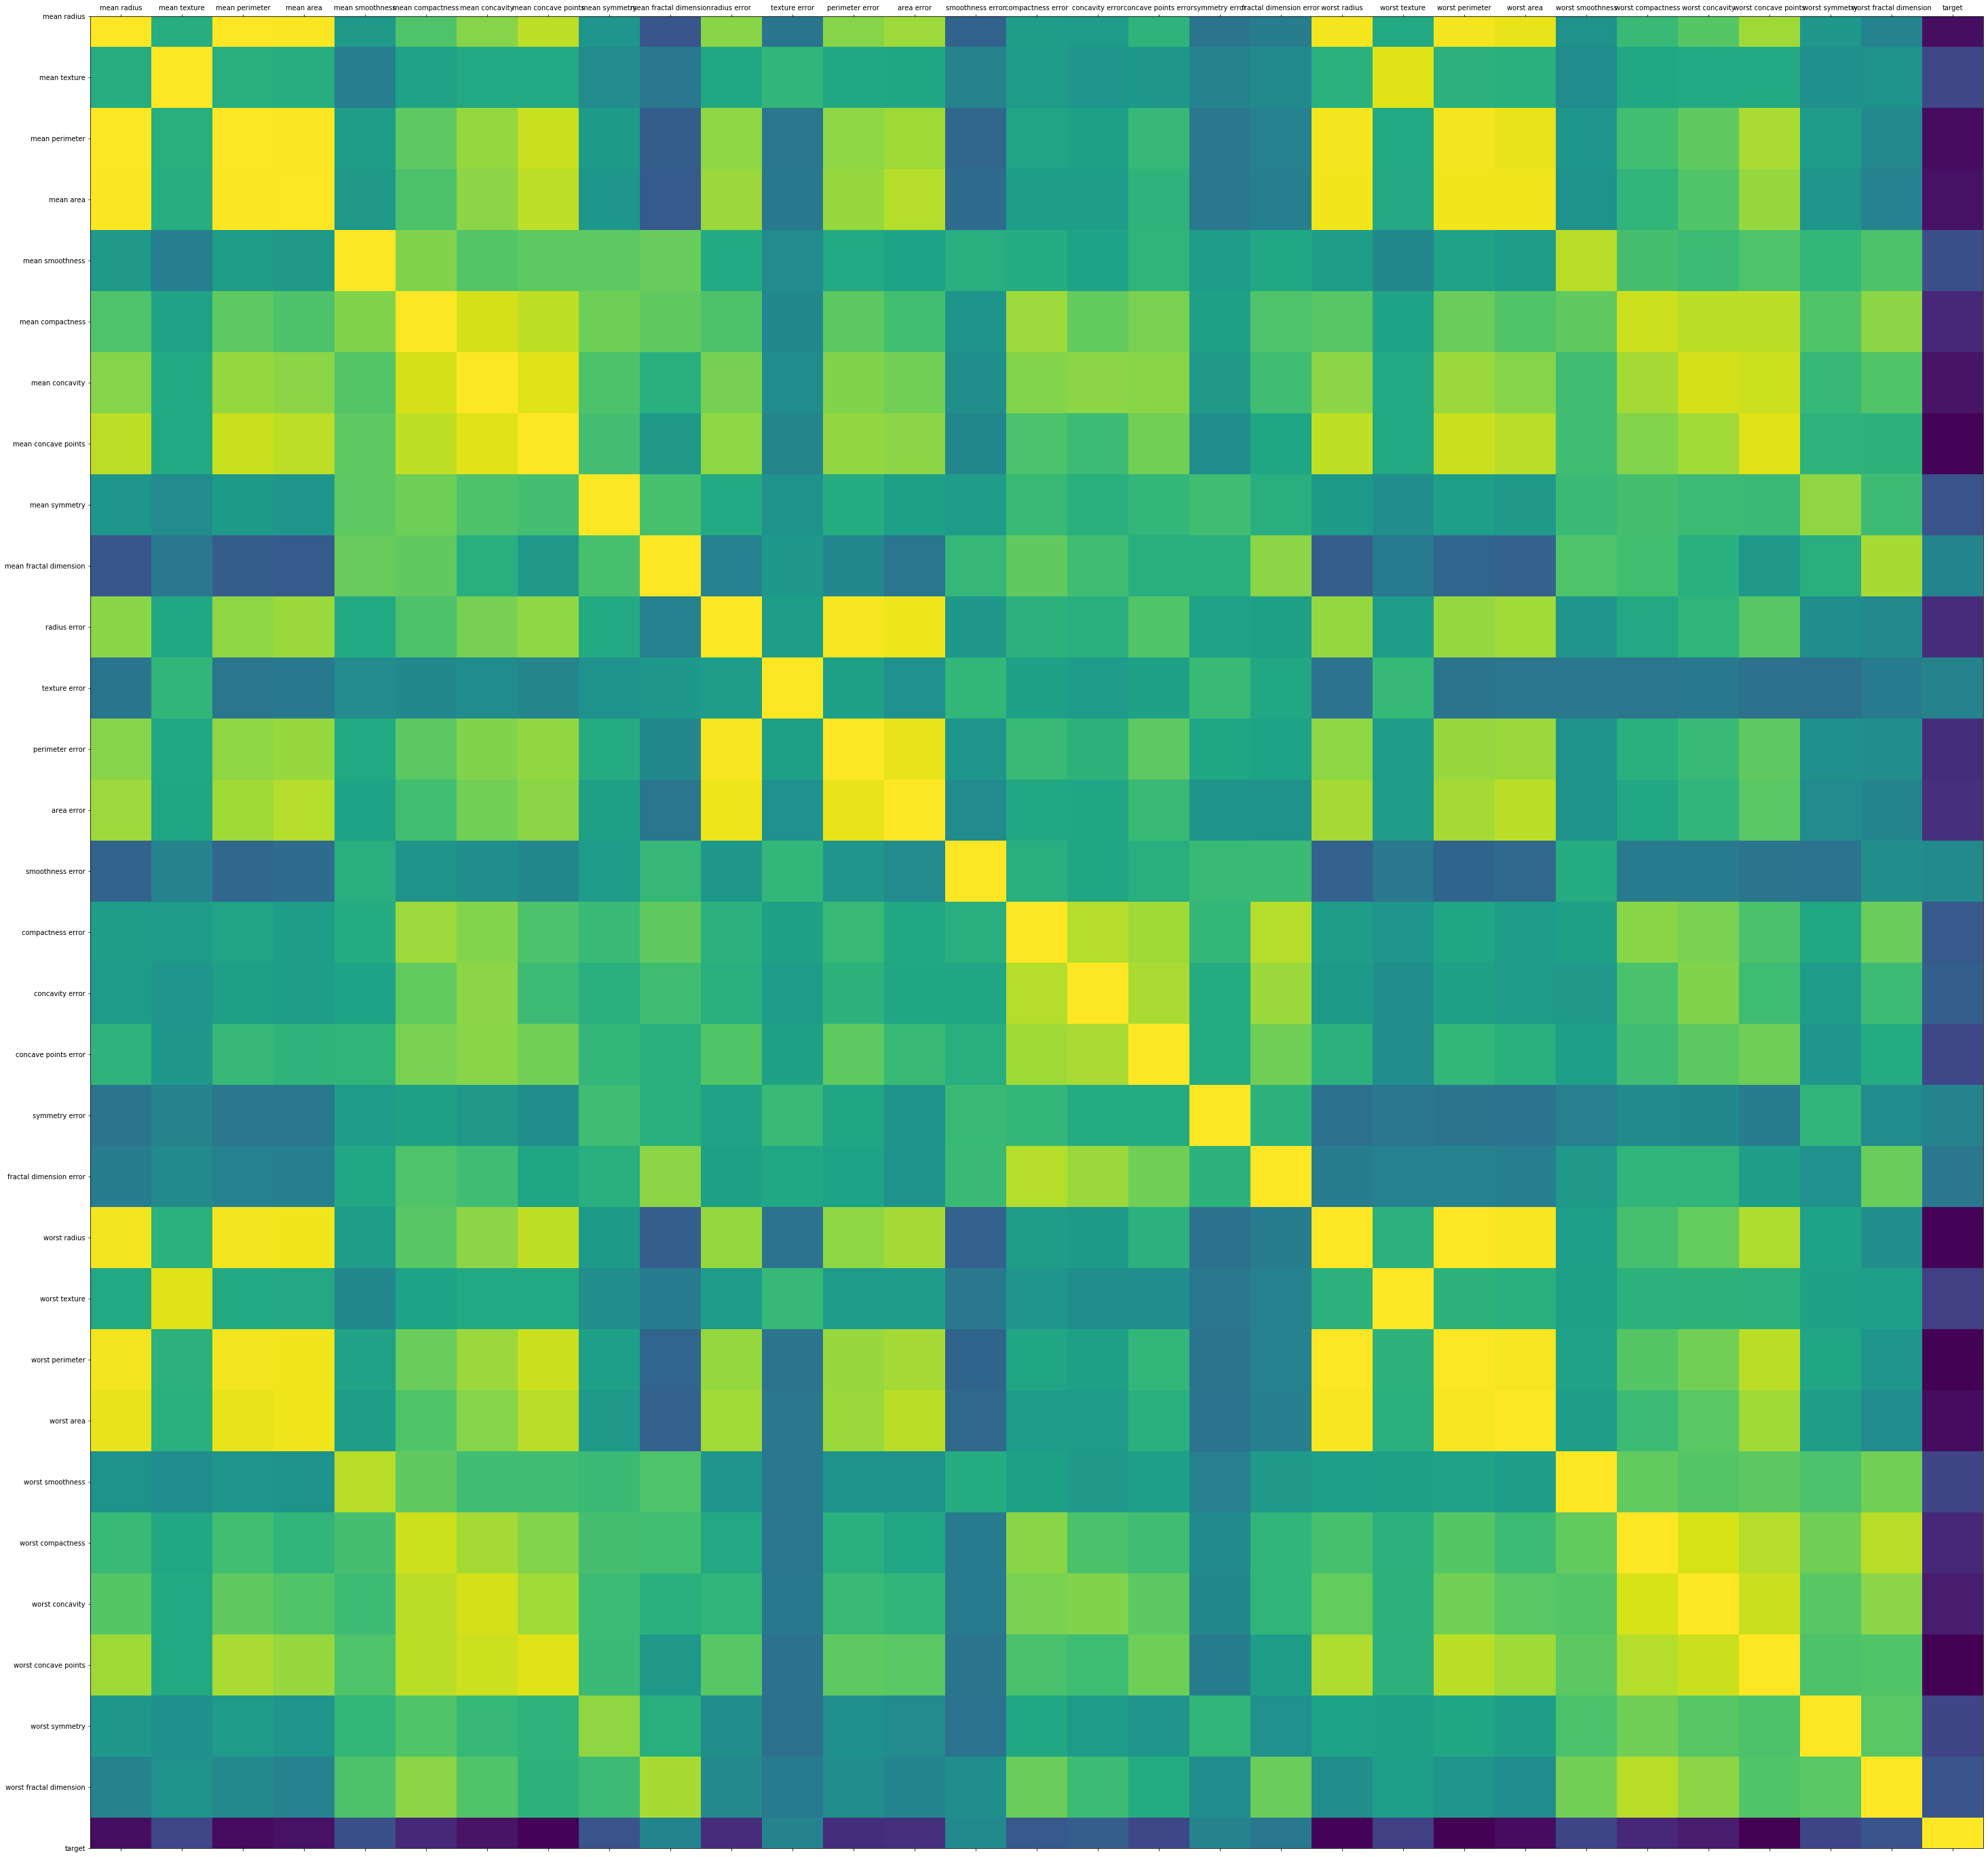

In [8]:
# Showing a Co-Relation between the different Data given on our Dataframe

def plot_it(dataframe, size=50):
    corr = dataframe.corr()    # A Dataframe Co-Relation Function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # Color Codes the recangle according to their value
    plt.xticks(range(len(corr.columns)), corr.columns)  
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_it(dataset)

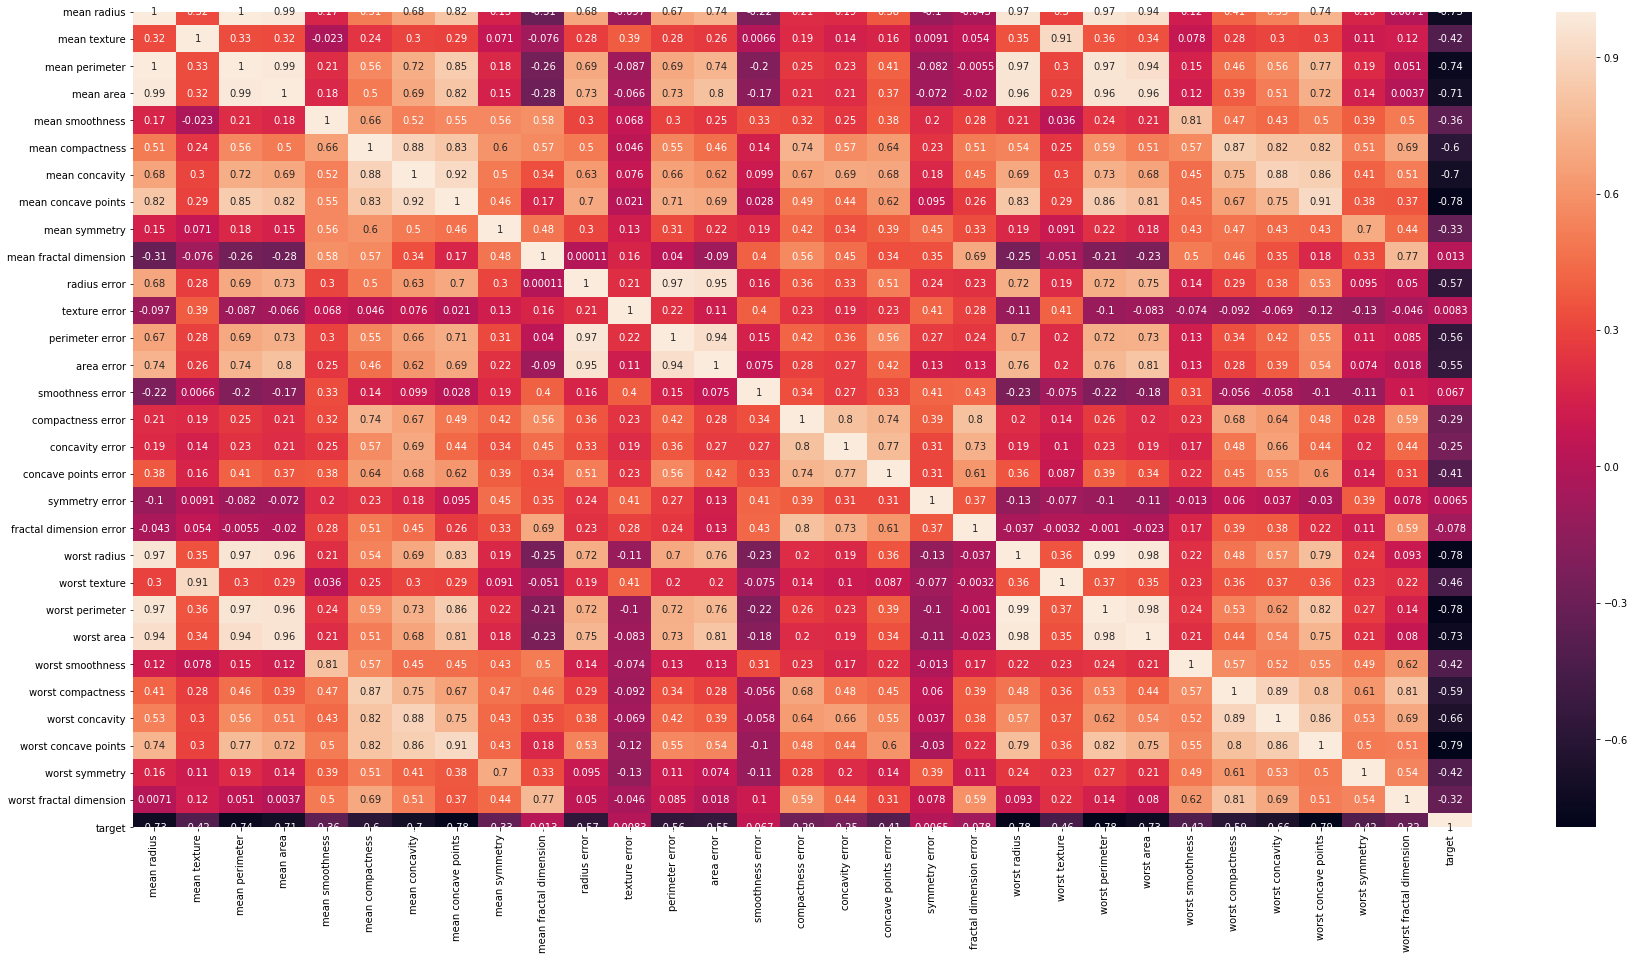

In [11]:
#Too messy, isn't it? Let's generate a heatmap to better analyze the dataset

plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(), annot=True) 
plt.show()

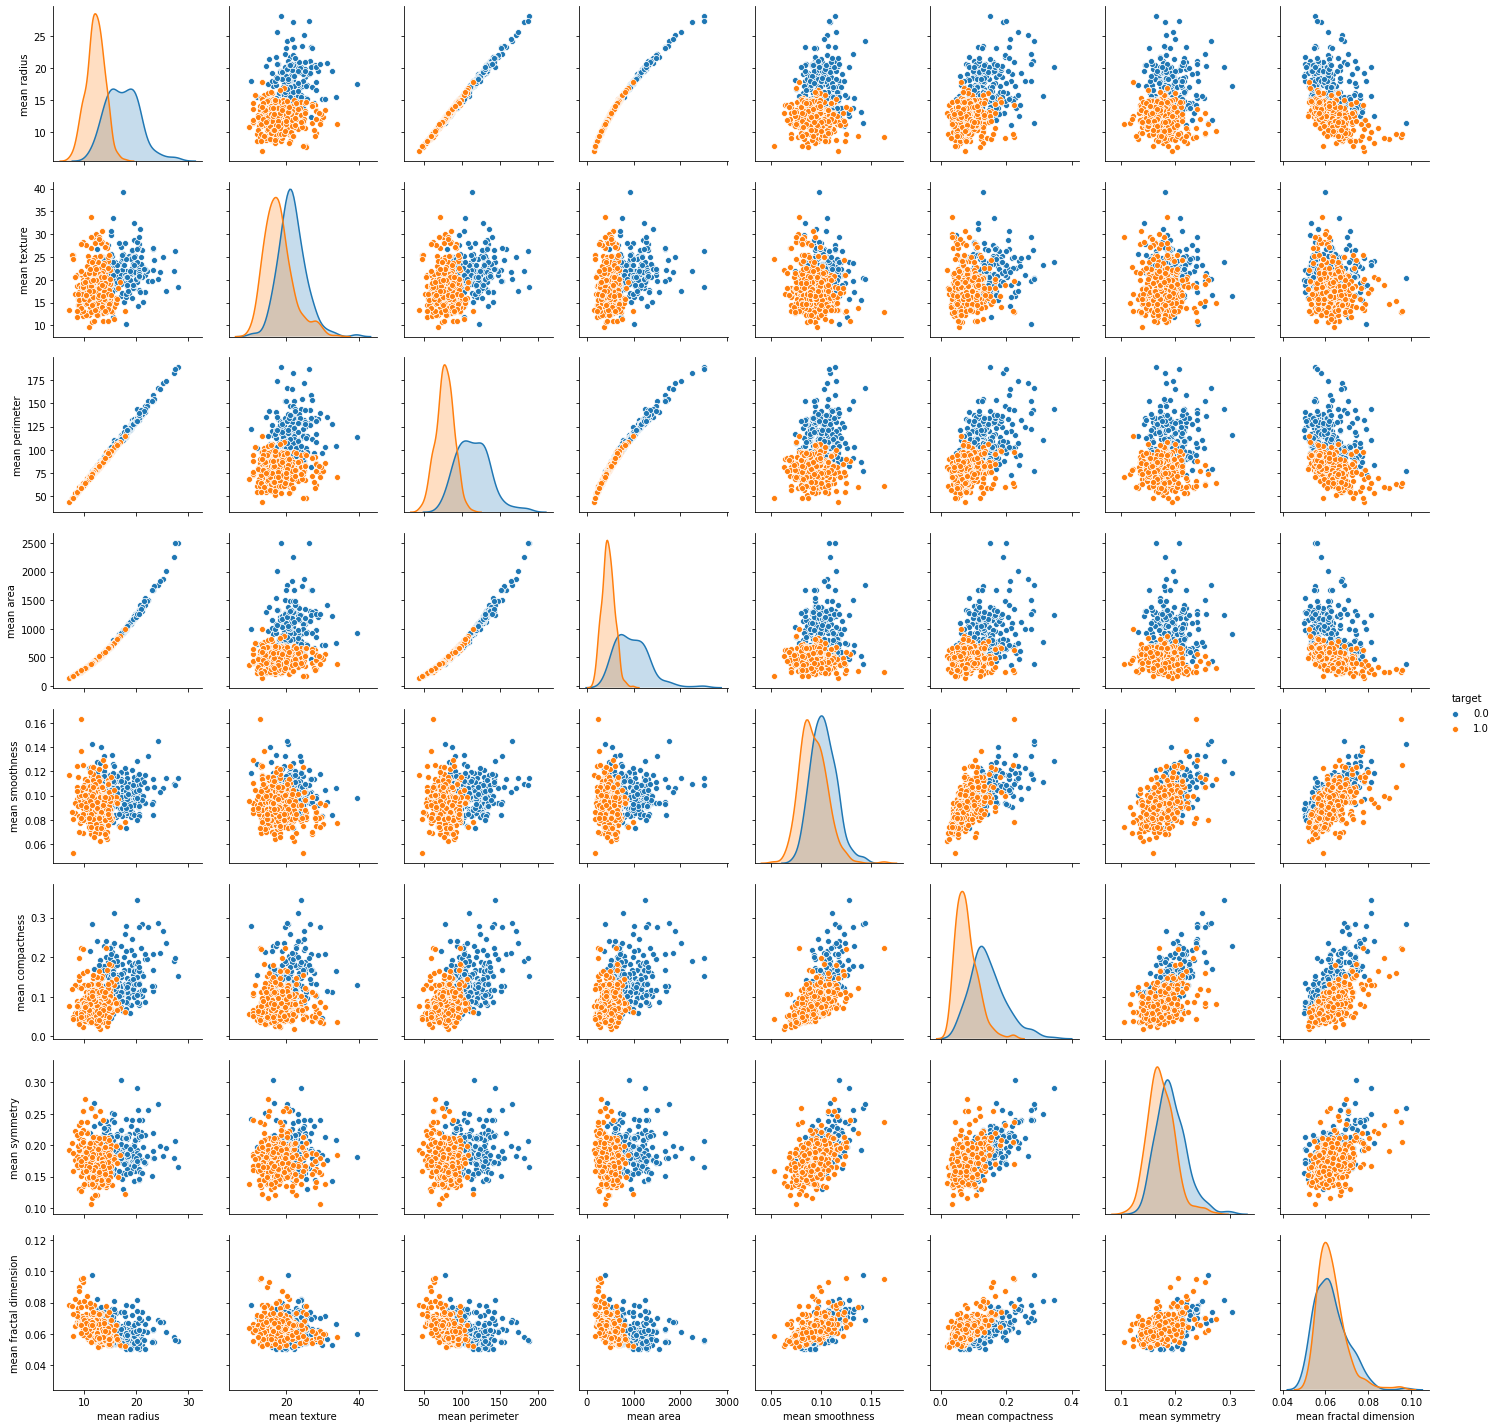

In [12]:
sns.pairplot(dataset, hue='target', vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean symmetry','mean fractal dimension'])
plt.show()

In [13]:
print('Columns of our Dataset: \n',dataset.columns)

Columns of our Dataset: 
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [14]:
print('Unique Column Count: \n')
for col in dataset:
    print(len(dataset[col].unique()), col)

Unique Column Count: 

456 mean radius
479 mean texture
522 mean perimeter
539 mean area
474 mean smoothness
537 mean compactness
537 mean concavity
542 mean concave points
432 mean symmetry
499 mean fractal dimension
540 radius error
519 texture error
533 perimeter error
528 area error
547 smoothness error
541 compactness error
533 concavity error
507 concave points error
498 symmetry error
545 fractal dimension error
457 worst radius
511 worst texture
514 worst perimeter
544 worst area
411 worst smoothness
529 worst compactness
539 worst concavity
492 worst concave points
500 worst symmetry
535 worst fractal dimension
2 target


In [15]:
dataset.shape

(569, 31)

In [16]:
dataset.describe

<bound method NDFrame.describe of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89

In [17]:
dataset.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89  

In [18]:
dataset.isnull().values.any()

False

In [19]:
#Thank God, that there is no Null Value in our Dataset. Helps with our Data Analysis!

#Now, let's analyze our Target Value. 1 and 0 are used to show if a patient, has Benign Tumour or Malignant Tumour. 

In [20]:
dataset["target"].describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [21]:
dataset["target"].unique()

array([0., 1.])

In [22]:
#We have now a Classification Problem at our hand and we gotta need to analyze this.
#Why not, we start with visualizing our Target Value with different attributes?

1.0    357
0.0    212
Name: target, dtype: int64


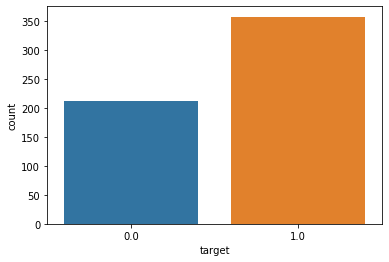

In [23]:
x=dataset["target"]
sns.countplot(x)
our=dataset.target.value_counts()
print(our)

In [25]:
#Seems like our pre-emtpive Data Analysis is quite over and it was quite fun. Now let's summon the gods of statistics and 
#Machine Learning to build our Models and get our Job done!

# Data-Set Splitting

In [26]:
from sklearn.model_selection import train_test_split
to_Predict=dataset.drop("target",axis=1)
to_Target=dataset["target"]

In [27]:
#We will split our Dataset into two parts: 70% Data for Training while the rest 30% Data will be used for testing
X_train,X_test,Y_train,Y_test = train_test_split(to_Predict,to_Target,test_size=0.30,random_state=0)

#Hullo! Our Training and Testing Data is prepared!!

# Algorithms Used: Logistic Regression

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
predicted=logistic_regression.predict(X_test)

###########################################################

final_score=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Logistic Regression is %r" %(final_score))

The accuracy of our model implemented through Logistic Regression is 96.4912


c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Algorithms Used: Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,Y_train)
predicted=gauss.predict(X_test)

###########################################################

final_score1=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Naive Bayes is %r" %(final_score1))

The accuracy of our model implemented through Naive Bayes is 92.3977


# Algorithms Used: Support Vector Classification

In [31]:
from sklearn import svm
Support_Vector=svm.SVC(kernel="linear")
Support_Vector.fit(X_train,Y_train)
predicted=Support_Vector.predict(X_test)

In [32]:
final_score2=round(accuracy_score(predicted,Y_test)*100,2)
print("The accuracy of our model implemented through Support Vector Classification is %r" %(final_score2))

The accuracy of our model implemented through Support Vector Classification is 95.91


# Final Analysis

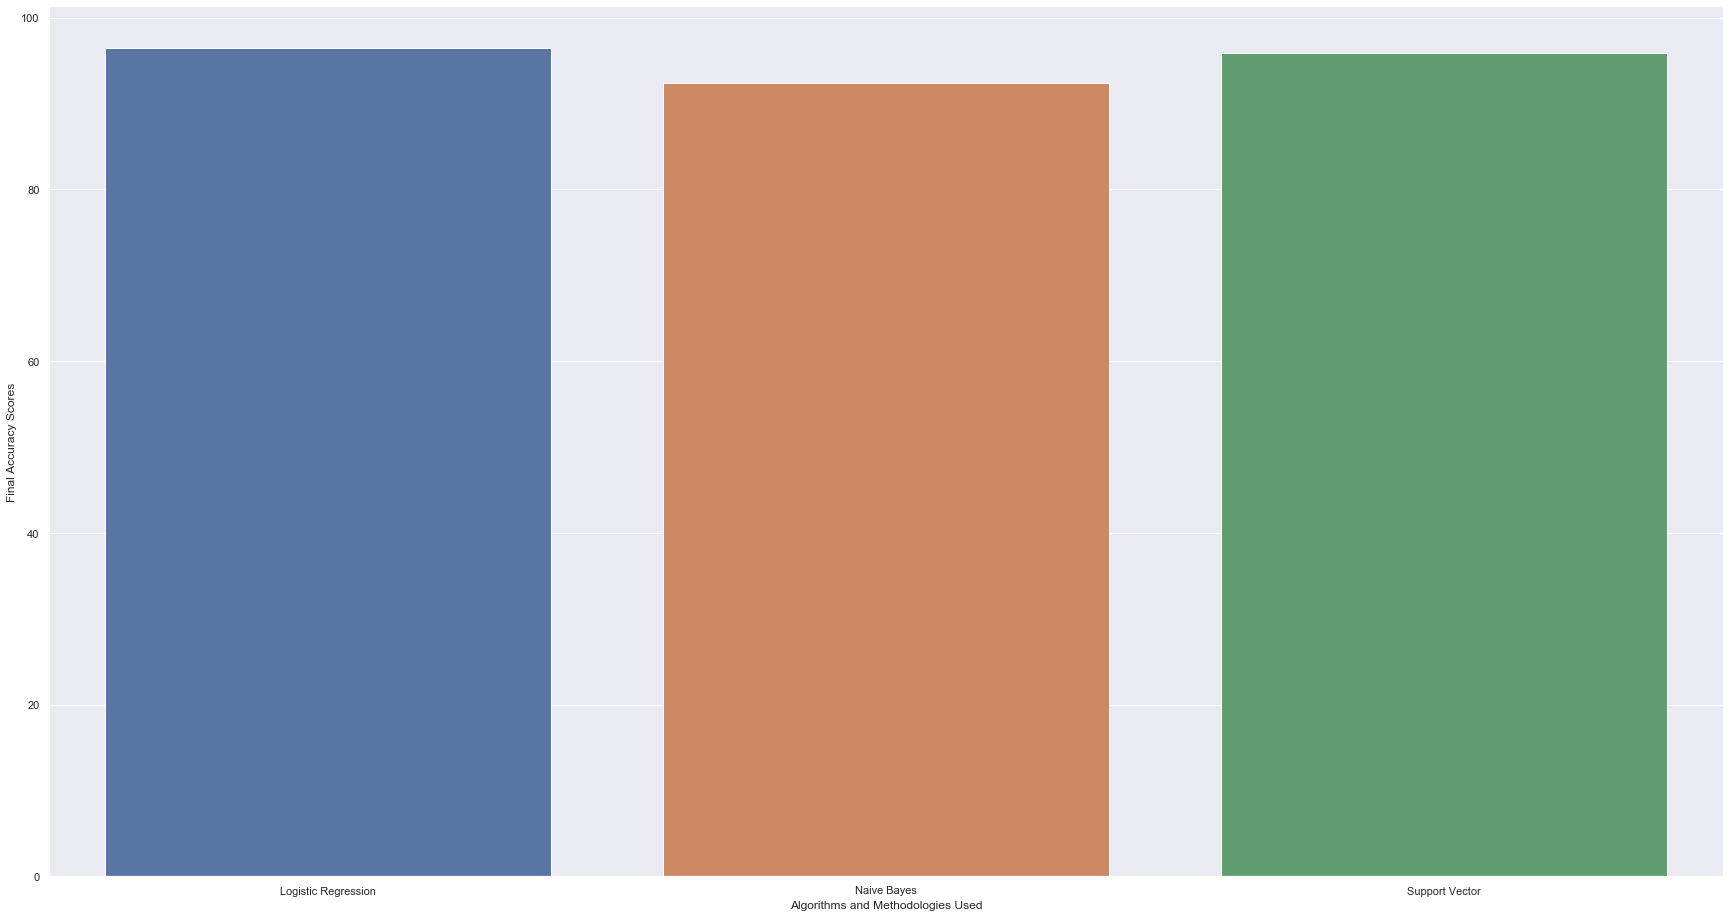

In [33]:
finale=[final_score,final_score1,final_score2]
methods=["Logistic Regression","Naive Bayes","Support Vector"]
sns.set(rc={'figure.figsize':(30,16)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final Accuracy Scores")
sns.barplot(methods,finale)

# 96.4912% Accuracy with Logistic Regression. That's a good model that we have implemented.

# Let's print the Confusion Matrix for each of the algorithms

In [35]:
from sklearn.metrics import confusion_matrix
hinata=logistic_regression.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

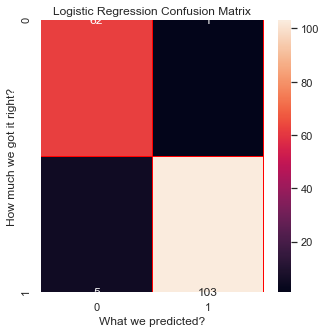

In [36]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

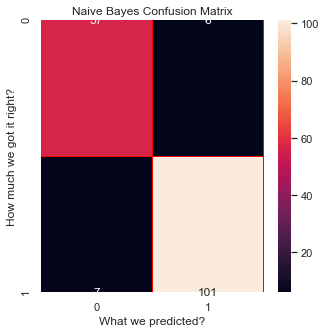

In [38]:
hinata=gauss.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [39]:
hinata=Support_Vector.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

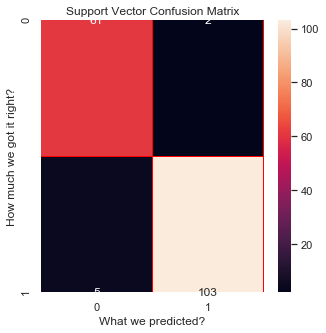

In [40]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Support Vector Confusion Matrix")
plt.show()

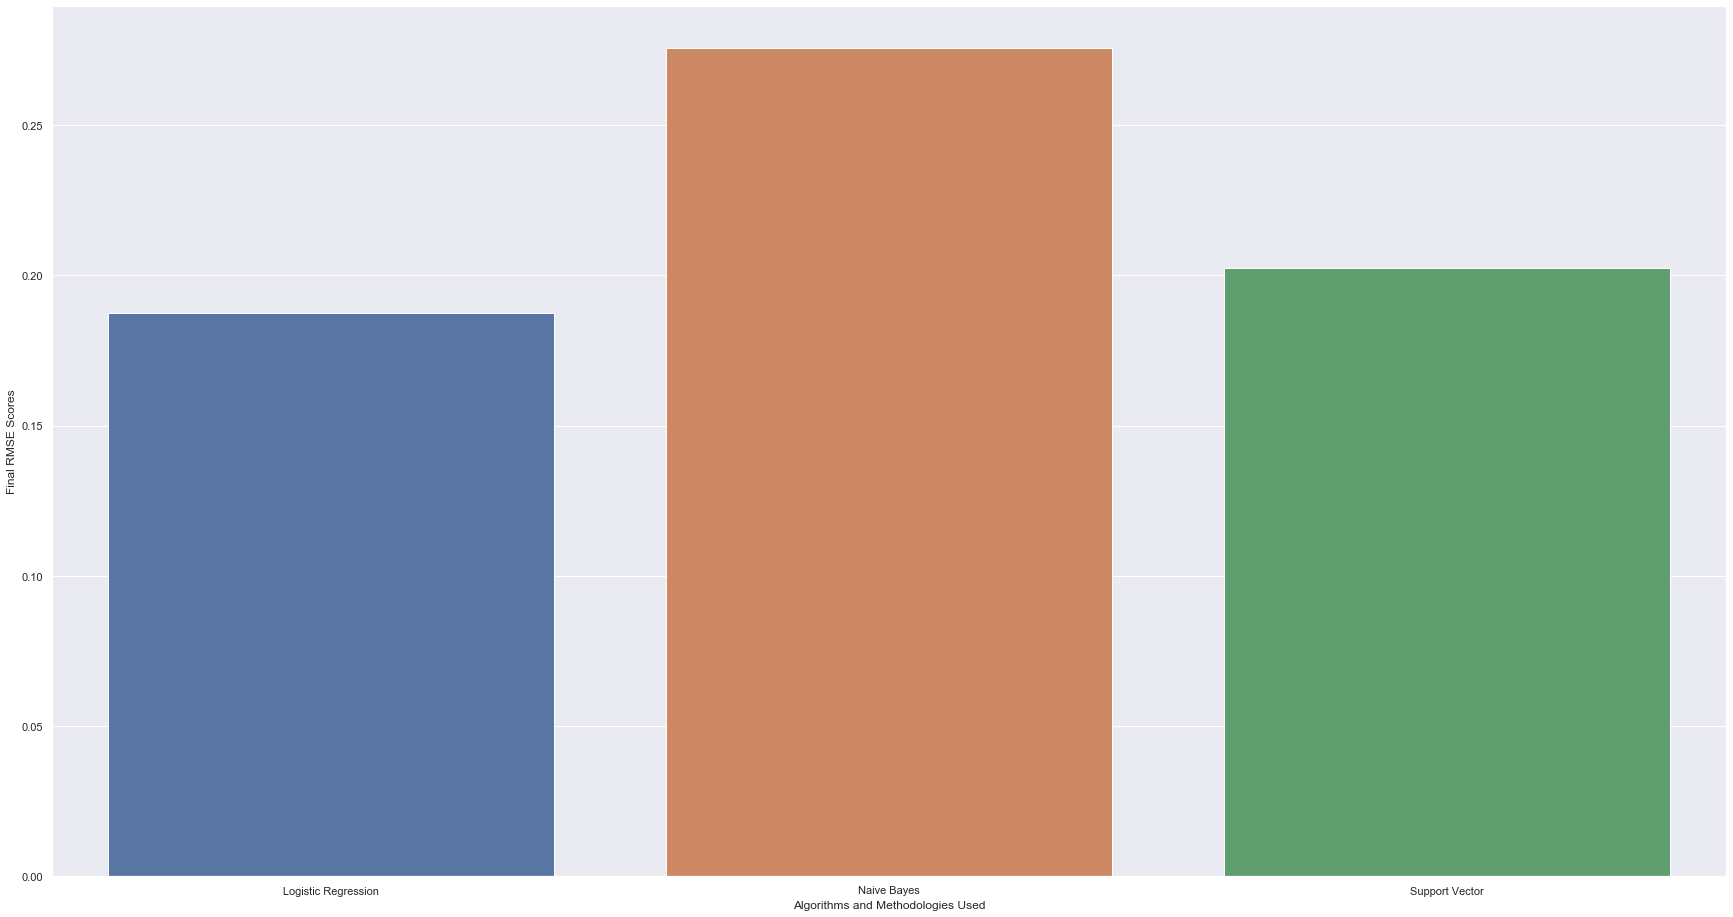

In [41]:
#Calculating Root-Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

Y_pred_lr = logistic_regression.predict(X_test)
Y_pred_rf = gauss.predict(X_test)
Y_pred_svm=Support_Vector.predict(X_test)

rmse_lr = sqrt(mean_squared_error(Y_test, Y_pred_lr))
rmse_svm= sqrt(mean_squared_error(Y_test, Y_pred_svm))
rmse_gauss = sqrt(mean_squared_error(Y_test, Y_pred_rf))

rmse_scores=[rmse_lr,rmse_gauss,rmse_svm]
sns.set(rc={'figure.figsize':(30,16)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final RMSE Scores")
sns.barplot(methods,rmse_scores)